Generating 1 dipoles
Dipole: theta=0.0, phi_d=0.0
initialisation time in OPM system 0.791516s
Tracing with 4 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 5.135403s
Time elapsed in addition 2.000000s
time in trace_rays_mp 7.131621s
----------------------------------
----------------------------------
[0.         0.         0.         ... 0.00270677 0.00270677 0.00270677]


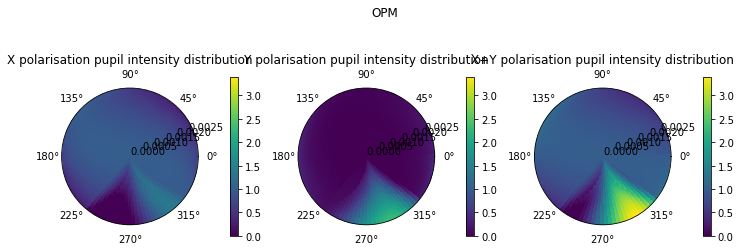

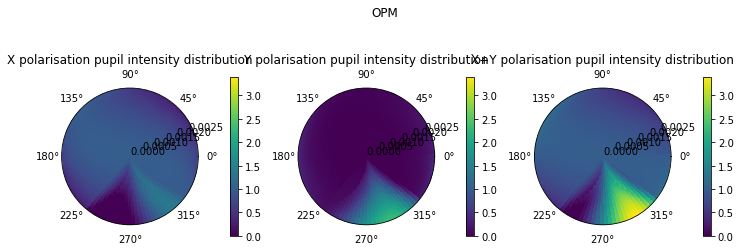

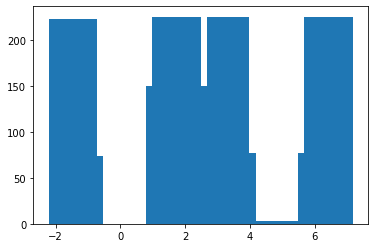

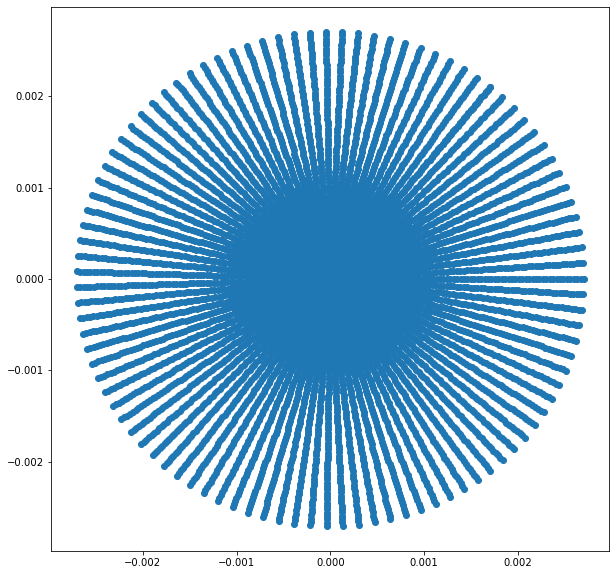

In [1]:
import optical_systems
import dipole_source
import numpy as np
from matplotlib import pyplot as plt

O1 = {'NA':1.2, 'n':1.33, 'f': 0.180/60, 'rotation':35}  # 60x
O2 = {'NA':0.95, 'n':1, 'f': 0.200/50}#, 'rotation':35}  # 50x
O3 = {'NA':0.6, 'n':1, 'f': 0.200/40}  # 40x
TL1 = {'NA':1, 'n':1, 'f': 0.180}
TL2 = {'NA':1, 'n':1, 'f': 0.160}
TL3 = {'NA':1, 'n':1, 'f': 0.162}

lenses = [O1, O2, O3, TL1, TL2, TL3]

lenses = [O1, TL1, O2, TL2]

lenses = [O1]

source = dipole_source.DipoleSource()
source.add_dipoles(0,0)
# TODO: automate the calculation of ray entrace angle etc
# source.get_rays(O1['NA']/O1['n'], O1['f'])

source_dict = {'name':'x-dipole', 'source':source}
output = optical_systems.objective_system(lenses, source_dict, processes=4, plot=True)

detector = output.detector

rad = detector.ray_polar_radius
phi = detector.ray_phi

rad = rad.astype(float)
phi = phi.astype(float)
print(rad)

x = rad*np.cos(phi)
y = rad*np.sin(phi)

plt.figure()
plt.hist(phi, bins=50)
plt.show()


plt.figure(figsize=[10, 10])
plt.scatter(x,y)
plt.show()
